In [1]:
import os
import numpy as np

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

color_x = 'red'
color_y = 'blue'

zero_control = np.vstack( [np.zeros((1,201)), np.zeros((1,201))] )[np.newaxis,:,:]

ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!


Compute control for a deterministic system
Cost in iteration 0: 298.32204411657347
diverging model output, decrease step size to  5.0
diverging model output, decrease step size to  2.5
diverging model output, decrease step size to  1.25
diverging model output, decrease step size to  0.625
diverging model output, decrease step size to  0.3125
diverging model output, decrease step size to  0.15625
diverging model output, decrease step size to  0.078125
diverging model output, decrease step size to  0.0390625
diverging model output, decrease step size to  0.01953125
Cost in iteration 100: 146.74861286992615
Cost in iteration 200: 91.1785701823369
Cost in iteration 300: 59.470566771548135
Cost in iteration 400: 36.074442832692284
Cost in iteration 500: 19.213550414835467
Cost in iteration 600: 10.067737108592222
Cost in iteration 700: 7.033351620935452
Cost in iteration 800: 5.436156709074557
Cost in iteration 900: 4.513118676501586
Cost in iteration 1000: 3.9757544175788064
Final cost : 3

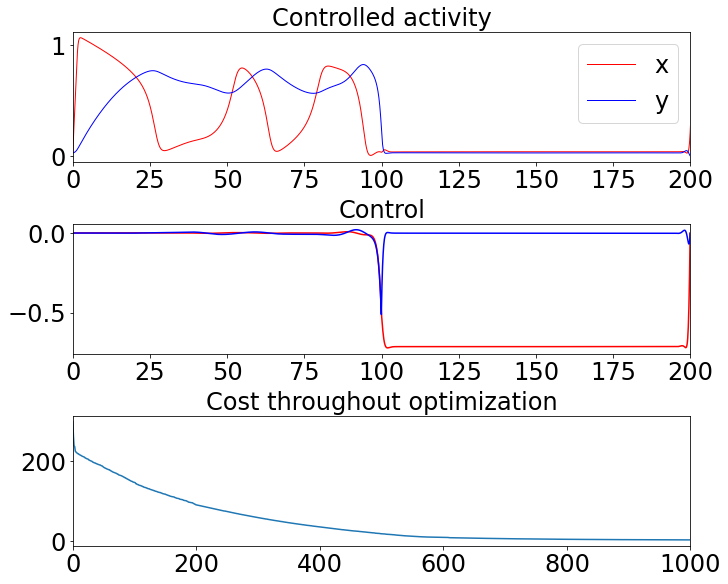

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from neurolib.models.fhn import FHNModel
from neurolib.optimal_control import oc_fhn


target = np.zeros(( 1,2,2001 ))
zero_input = np.zeros((1,2001))
zero_control = np.vstack( [zero_input, zero_input] )[np.newaxis,:,:]

model = FHNModel()
model.params["duration"] = 200.
model.params['x_ou_mean'] = 0.8
model.run()

model.params["x_ext"] = zero_input
model.params["y_ext"] = zero_input

model_controlled = oc_fhn.OcFhn(model, target, w_p=1., w_2=0.01, print_array=np.arange(0,1001,100), precision_cost_interval=[1000,-1])

# We run 100 iterations of the optimal control gradient descent algorithm
model_controlled.optimize(1000)

state = model_controlled.get_xs()
control = model_controlled.control

plot(state, target, control, model_controlled.cost_history)



In [39]:
# define plot function for later convenience
def plot(state, target, control, weight_array=[], M=1):
    fs_ = 24
    duration = model.params.duration
    dt = model.params.dt
    fig, ax = plt.subplots( 3,1, figsize=(10,8), constrained_layout=True)

    # Plot the target (dashed line) and unperturbed activity
    t_array = np.arange(0, duration+dt, dt)

    ax[0].plot(t_array, state[0,0,:], label="x", color=color_x, linewidth=1)
    ax[0].plot(t_array, state[0,1,:], label="y", color=color_y, linewidth=1)
    #ax[0].plot(t_array, target[0,0,:], linestyle='dashed', label="Target x", color=color_x)
    #ax[0].plot(t_array, target[0,1,:], linestyle='dashed', label="Target y", color=color_y)
    ax[0].legend(fontsize=fs_, loc="upper right")
    ax[0].tick_params(axis='both', labelsize=fs_)
    ax[0].set_xlim([0,200.])
    ax[0].set_title("Controlled activity", fontsize=fs_)

    for m in range(M-1):
        model.run()
        state = np.concatenate((np.concatenate( (model.params["xs_init"], model.params["ys_init"]), axis=1)[:,:, np.newaxis], np.stack( (model.x, model.y), axis=1)), axis=2)
        ax[0].plot(t_array, state[0,0,:], label="x", color=color_x, linewidth=1)
        ax[0].plot(t_array, state[0,1,:], label="y", color=color_y, linewidth=1)

    # Plot the target control signal (dashed line) and "initial" zero control signal
    ax[1].plot(t_array, control[0,0,:], label="stimulation x", color=color_x)
    ax[1].plot(t_array, control[0,1,:], label="stimulation y", color=color_y)
    #ax[1].plot(t_array, input[0,0,:], linestyle='dashed', label="input x", color=color_x)
    #ax[1].plot(t_array, input[0,1,:], linestyle='dashed', label="input y", color=color_y)
    #ax[1].legend(fontsize=fs_)
    ax[1].set_title("Control", fontsize=fs_)
    ax[1].tick_params(axis='both', labelsize=fs_)
    ax[1].set_xlim([0,200.])

    ax[2].plot(weight_array)
    ax[2].tick_params(axis='both', labelsize=fs_)
    ax[2].set_xlim([0,1000.])
    ax[2].set_title("Cost throughout optimization", fontsize=fs_)

    plt.show()

In [ ]:
from neurolib.models.fhn import FHNModel
from neurolib.optimal_control import oc_fhn

m = FHNModel()
m.params["duration"] = 200.
m.run()

m_oc = oc_fhn.OcFhn(m, target, w_p=1.,
    w_2=0.01, precision_cost_interval=[1000,-1])
m_oc.optimize(1000)

x = m_oc.get_xs()
u = m_oc.control
plot(x, target, u, m_oc.cost_history)